<h3>Dependencies</h3>

In [1]:
from sklearn.decomposition import TruncatedSVD
from gensim.models import word2vec
import matplotlib.pyplot as plt
import random
import csv
import numpy as np

<h3>Working with Text Data: Word Vectors</h3>

<em>Recommended to read: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html </em>

<em>In addition to Gensim tutorial, code snippets re-utilized from Assignment 1 in http://web.stanford.edu/class/cs224n/index.html#schedule </em>

In [2]:
def w2v(corpus):
    
    """
    Selection of training parameters was done base on iterations of different values
    
    Input: Corpus of Type List []
    
    Output: Word to vector Model
    
    Model Parameters:
    - size (feature_size): Sets the N-Dimensional space where the words are mapped onto; Number of Dimensions
    - window (context_window): the number of tokens to the left and right of the word that we want to predict in
      the CBOW model
    - min_count: minimun number of times a word  must appear in the corpus to be taken into account
    - sample: diminish the impact of high frequency words (appear too often)
    
    """
    
    feature_size = 50
    context_window = 10
    min_word_count = 10
    sample = 1e-3
    
    w2v_chat_model = word2vec.Word2Vec([corpus], size= feature_size, window= context_window, \
                                      min_count= min_word_count, sample=sample, iter=50)
    
    return w2v_chat_model


def get_matrix_of_vectors_short(wv_from_chat):
    
    """
    
    Input: wv_from_chat
    Word Vectors Object obtained from the model using method .wv (word_vectors = model.wv )
    
    Output: M, word2Ind
    M: Matrix of Word vectors stacked of type Numpy Array
    word2Ind: Dictionary mapping each word to its row number in matrix M
    
    """
    words = list(wv_from_chat.vocab.keys())
    random.shuffle(words)
    print("Creating matrix of Word Vectors, putting %i words into Word2Ind"% len(words))
    word2Ind = {}
    cur_ind = 0
    M = []
    
    for w in words:
        try:
            M.append(wv_from_chat.word_vec(w))
            word2Ind[w] = cur_ind
            cur_ind +=1
            
        except KeyError:
            continue
            
    M = np.stack(M)
    print("done")
    
    return M, word2Ind

In [120]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of corpus words, number of corpus words)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    M_reduced = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced = M_reduced.fit_transform(M)
    
    print("Done.")
    return M_reduced


def plot_embeddings(M_reduced, word2Ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2Ind.
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , k)): matrix of k-dimensioal word embeddings
            word2Ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """

    
    print(words, 'entry words')
    
    for i, word_t in enumerate(words):
        index = word2Ind[word_t]
        embedding = M_reduced[index]
        x_coord = embedding[0]
        y_coord = embedding[1]
        x = x_coord
        y = y_coord
        
        plt.scatter(x, y, marker ='x', color ='red')
        plt.text(x, y, word_t, fontsize=9)
    plt.show()

    # -----------------

<h3>Loading the dataset </h3>

In [4]:
with open('dialogue.csv') as dialogue:
    corpus_reader = csv.reader(dialogue)
    corpus = [tokens for tokens in corpus_reader][0]
    

<h3>Calculating the model and word vectors</h3>

In [5]:
model = w2v(corpus)
word_vectors = model.wv 

<h3> Word vector as a Matrix</h3>

In [7]:
M, word2Ind = get_matrix_of_vectors_short(word_vectors)

Creating matrix of Word Vectors, putting 1485 words into Word2Ind
done


<h3>Dimensionality Reduction: SVD</h3>
<p> We do this to reduce dimensionality and be able to plot the word vector in 2-D, by using Singular Value Decomposition, what we aim to achieve is that by using the singular values and vectors we can aproximate to the higher dimension matrix using a lower rank version of it. </p>

In [8]:
M_reduced = reduce_to_k_dim(M, k=2)

Running Truncated SVD over 1485 words...
Done.


['steffen', 'lukas', 'martin', 'wings', 'chicken', 'drink', 'jesus', 'bike', 'beer', 'work'] entry words


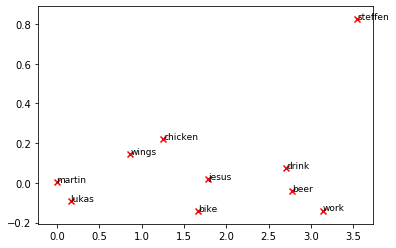

In [121]:
words = ['steffen', 'lukas', 'martin', 'wings', 'chicken', 'drink', 'jesus', 'bike', 'beer', 'work']
plot_embeddings(M_reduced, word2Ind, words)

In [13]:
M_reduced[0]

array([0.0078161 , 0.00121476], dtype=float32)